##Red-Wine Quality Project

###Regression

##Data Preprocessing

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
dataset=pd.read_csv('/content/datasets_4458_8204_winequality-red.csv')

In [104]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [106]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [107]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

##Separate Features & Target

* 'Quality' is the target

* Others details or columns are features

In [108]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

##Splitting Data Into Train & Test Sets

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##Plotting of Graph

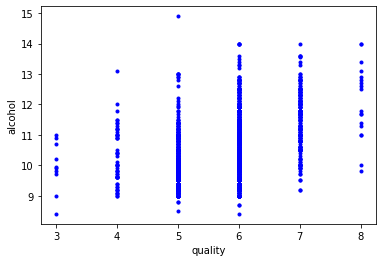

In [111]:
plt.plot(dataset['quality'],dataset['alcohol'],'b.')
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

##Standardization

In [112]:
from sklearn.preprocessing import  StandardScaler

In [113]:
t_train=y_train.reshape(len(y_train),1)
t_test=y_test.reshape(len(y_test),1)

In [114]:
x_sc=StandardScaler()
y_sc=StandardScaler()

In [115]:
x_std_train=x_sc.fit_transform(x_train)
y_std_train=y_sc.fit_transform(t_train)

In [116]:
x_std_test=x_sc.transform(x_test)
y_std_test=y_sc.transform(t_test)

##Train on Different Algorithms

* Here I've trained in 5 different algorithms

1. LogisticRegression  -  'linear_model'  library used

2. PolynomialFeatures  - 'preprocessing'  library used

3. DecisionTreeRegressor  - 'tree'  library used

4. RandomForestRegressor  - 'ensemble'  library used

5. SVR  - 'svm' library used

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [118]:
l_reg=LinearRegression()
p_reg=LinearRegression()
d_reg=DecisionTreeRegressor()
r_reg=RandomForestRegressor()
s_reg=SVR()

In [119]:
x_poly=PolynomialFeatures(degree=2)
x_poly=x_poly.fit_transform(x_train)

In [120]:
l_reg.fit(x_train,y_train)
p_reg.fit(x_poly,y_train)
d_reg.fit(x_train,y_train)
r_reg.fit(x_train,y_train)
s_reg.fit(x_std_train,y_std_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [121]:
temp=PolynomialFeatures(degree=2)
temp=temp.fit_transform(x_test)

In [122]:
l_pred=l_reg.predict(x_test)
p_pred=p_reg.predict(temp)
d_pred=d_reg.predict(x_test)
r_pred=r_reg.predict(x_test)
s_pred=s_reg.predict(x_std_test)

##Result

In [123]:
from sklearn.metrics import r2_score

In [124]:
l=r2_score(y_test,l_pred)
p=r2_score(y_test,p_pred)
d=r2_score(y_test,d_pred)
r=r2_score(y_test,r_pred)
s=r2_score(y_std_test,s_pred)

In [125]:
print('Logistic Regression: ' + str(l) + '\nPolynomial Fetures: ' + str(p) + '\nDecision Tree: ' + str(d) + '\nRandom Forest: ' + str(r) + '\nSVR: ' + str(s))

Logistic Regression: 0.3804696479200804
Polynomial Fetures: 0.38858428543530465
Decision Tree: 0.1869087189976989
Random Forest: 0.5340552288417285
SVR: 0.4513444798281693


In [127]:
condition=[(dataset['quality']>=7.5),(dataset['quality']<7.5)]
res=['Good','Bad']
dataset['review']=np.select(condition,res)

In [128]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


##Conclusion

According to this regression, the 'RandomForestRegresor' is giving the better efficiency.

So we can consider this as the best algorithms for this dataset using classification as 'RandomForestRegressor'.